Here we combine the preprocessed data from the Covid-19 survey and the University Health Survey.

In [219]:
import pandas as pd

file1 = '../data/covid_data_preprocessed.csv'
file2 = '../data/uhs_men_preprocessed.csv'
file3 = '../data/uhs_women_preprocessed.csv'

df_covid = pd.read_csv(file1)
df_uhs_m = pd.read_csv(file2)
# Rename columns to that correspond to columns in the Covid-19 dataset
df_uhs_m = df_uhs_m.rename(columns = {'unih': 'Sleeptime (h)',
                                      'stressi': 'Stress',
                                      'yöheräily': 'Wakes'})
df_uhs_w = pd.read_csv(file3)
df_uhs_w = df_uhs_w.rename(columns = {'unih': 'Sleeptime (h)',
                                      'stressi': 'Stress',
                                      'yöheräily': 'Wakes'})

# Merge the datasets
df_uhs = pd.concat([df_uhs_m, df_uhs_w], ignore_index=True)

In [220]:
df_uhs.columns


Index(['Sleeptime (h)', 'riituni', 'Wakes', 'hermostun', 'masennus',
       'ahdistus', 'unettom', 'Stress', 'liikunta', 'miettii_terveel',
       'alkoholia', 'ikäryhmä'],
      dtype='object')

In [221]:
# change finnish column names

df_uhs = df_uhs.rename(columns = {'riituni': 'Restfulness',
                                  'hermostun': 'Nervousness',
                                  'masennus' : 'Depression',
                                  'ahdistus' : 'Anxiety',
                                  'unettom' : 'Insomnia',
                                  'liikunta' : 'Exercise',
                                  'miettii_terveel' : 'Food Healthiness',
                                  'alkoholia' : 'Alcohol',
                                  'ikäryhmä' : 'Age Group'} ) 



In [222]:
df_uhs.columns


Index(['Sleeptime (h)', 'Restfulness', 'Wakes', 'Nervousness', 'Depression',
       'Anxiety', 'Insomnia', 'Stress', 'Exercise', 'Food Healthiness',
       'Alcohol', 'Age Group'],
      dtype='object')

In [223]:
df_covid.columns

# remove the id column from the covid dataset
df_covid = df_covid.drop(['id'], axis=1)

In [224]:
df_covid.columns

Index(['Steps', 'Socialize (min)', 'Leave house', 'People contact',
       'Alcohol (bev)', 'Exercise', 'Stress', 'Worry (scale)',
       'Worry (finances)', 'Worry (health)', 'PHQ9', 'PANAS (NA)',
       'PANAS (PA)', 'Isolation', 'Latency', 'Wakes', 'Sleeptime (h)',
       'country', 'age1', 'student'],
      dtype='object')

In [225]:
# get the shared columns between the two datasets
shared_columns = df_uhs.columns.intersection(df_covid.columns)
print(shared_columns)

Index(['Sleeptime (h)', 'Wakes', 'Stress', 'Exercise'], dtype='object')


In [226]:
# there is different types of stress values in the two sets 

# uhs 
#'Wakes': 
#   "0 No", "1 Occasionally", "2 Weekly", "3 Daily or almost daily"
#'Nervousness'
#   "0 No", "1 Occasionally", "2 Weekly", "3 Daily or almost daily"
#'Depression'
#    "0 No", "1 Occasionally", "2 Weekly", "3 Daily or almost daily"
#'Anxiety'
#   "0 No", "1 Occasionally", "2 Weekly", "3 Daily or almost daily"
# 'Insomnia'
#   "1 Not at all", "2 No more than usual", "3 Rather more than usual", "4 Much more than usual"
# 'Stress'
#    "1 Not at all", "2 No more than usual", "3 Rather more than usual", "4 Much more than usual"
# 'Exercise'
#   "0 Not at all or very seldom", "1 1-3 times a month", "2 Roughly once a week", "3) 2-3 times a week",
#   "4) 4-6 times a week", "5 Daily"

# 'Food Healthiness'
#   0 Never or very seldom", "1 Occasionally", "2 Often"
#'Alcohol'
#   "0 Never", "1 Monthly or less often", "2 2-3 times a month", "3 Once a week",
#   "4) 2-3 times a week", "5 Four times a week or more often"

# 'Age Group

# in the covid set :
# 'Steps' : average step count in the time frame (calculated)
# 'Socialize (min)'
# 'Leave house' 1: yes and 0: no
# 'People contact', How many people they have contacted 
# 'Alcohol (bev)', Average number of alcoholic beverages per day 
# 'Exercise' 1: yes and 0: no
# 'Stress' : overall stress level
# 1. completely consumed by stress , 7. not at all stressed
# 'Worry (scale)'  scale from 1 to 7 and 1 is the most worried
# 'Worry (finances)' scale from 1 to 7 and 1 is the most worried
# 'Worry (health)' scale from 1 to 7 and 1 is the most worried
# 'PHQ9' sum of column depsession1-8 the greater the score the more depressed
# 'PANAS (NA)', negative affect scale; the more the person felt negative emotions the higher the score
# 'PANAS (PA)' positive affect scale the higher the score the more positive emotions the person felt
# 'Isolation' : How isolated do you feel 1: completely isolated 
# 'Latency' How many minutes it takes to fall asleep
# 'Wakes' How many times the person wakes up during the night
# 'Sleeptime (h)', How many hours the person sleeps per night
# 'country' where the person is from
# 'student' 1: yes and 0: no
# 'Age Group' same as uhs 


#revert the values in the covid dataset 
# so that 7 is 1, 6 is 2 and so on 
# so that the values match the uhs dataset


In [227]:
# get the data types of columns in the covid dataset
df_covid.dtypes
df_covid.head()

,Steps,Socialize (min),Leave house,People contact,Alcohol (bev),Exercise,Stress,Worry (scale),Worry (finances),Worry (health),PHQ9,PANAS (NA),PANAS (PA),Isolation,Latency,Wakes,Sleeptime (h),country,age1,student
0,11383.333333,3.333333,1.000000,1.666667,1.000000,0.333333,3.333333,20.000000,4.333333,5.666667,1.666667,17.666667,11.666667,3.666667,6.666667,1.333333,8.722222,UNITED STATES,20.0,1.0
1,9000.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,22.000000,3.000000,5.000000,1.000000,12.000000,18.000000,3.000000,15.000000,1.000000,8.500000,UNITED STATES,21.0,1.0
2,13816.500000,0.000000,1.000000,0.500000,0.000000,0.000000,3.500000,25.500000,4.500000,6.500000,7.000000,17.500000,10.500000,2.000000,20.000000,1.000000,7.750000,UNITED STATES,20.0,1.0
3,6352.476190,49.761905,0.619048,11.095238,0.190476,0.619048,3.571429,10.714286,2.000000,2.619048,6.666667,24.809524,34.285714,5.523810,9.047619,1.952381,7.730159,UNITED STATES,53.0,0.0
4,4924.000000,0.000000,1.000000,20.000000,0.000000,0.000000,1.000000,12.000000,2.000000,1.000000,5.000000,25.000000,21.000000,1.000000,30.000000,3.000000,8.666667,UNITED STATES,43.0,0.0


In [228]:
# get the data types of columns in the uhs dataset
df_uhs.dtypes
# change all the data types in the uhs dataset to float
df_uhs = df_uhs.astype(float)




<Axes: xlabel='age1'>

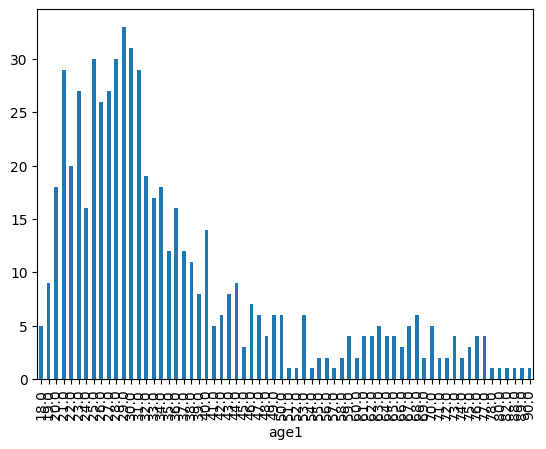

In [229]:
# plot the age values in the covid dataset
df_covid['age1'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='age1'>

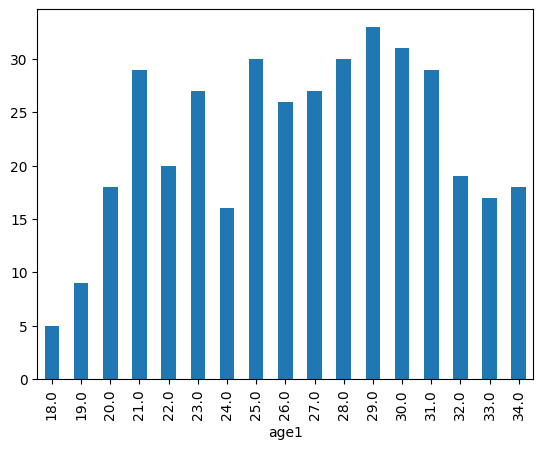

In [230]:


# remove the rows with age values over 34 from the covid dataset
df_covid = df_covid[df_covid['age1'] <= 34]

# plot the age values in the covid dataset
df_covid['age1'].value_counts().sort_index().plot(kind='bar')

In [231]:
# age1 column in the covid dataset is the age as years but the age group in the uhs dataset is in age groups
# 1 = under 22
# 2 = 22-24
# 3 = 25-29
# 4 = 30-34
# we need to change the age1 column to match the age groups in the uhs dataset

# creating a new column Age Group to the covid dataset
df_covid['Age Group'] = 0

# changing the values in the Age Group column to match the age groups in the uhs dataset
df_covid.loc[df_covid['age1'] <= 21, 'Age Group'] = 1
df_covid.loc[(df_covid['age1'] >= 22) & (df_covid['age1'] <= 24), 'Age Group'] = 2
df_covid.loc[(df_covid['age1'] >= 25) & (df_covid['age1'] <= 29), 'Age Group'] = 3
df_covid.loc[(df_covid['age1'] >= 30) & (df_covid['age1'] <= 34), 'Age Group'] = 4





In [232]:
# print the unique values in the Age Group column
df_covid['Age Group'].unique()

# drop the age1 column
df_covid = df_covid.drop('age1', axis=1)
# combining using the shared columns Sleeptime (h) Stress, Excercise and Wakes



In [233]:
df_covid.head()

,Steps,Socialize (min),Leave house,People contact,Alcohol (bev),Exercise,Stress,Worry (scale),Worry (finances),Worry (health),PHQ9,PANAS (NA),PANAS (PA),Isolation,Latency,Wakes,Sleeptime (h),country,student,Age Group
0,11383.333333,3.333333,1.000000,1.666667,1.000000,0.333333,3.333333,20.000000,4.333333,5.666667,1.666667,17.666667,11.666667,3.666667,6.666667,1.333333,8.722222,UNITED STATES,1.0,1
1,9000.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,22.000000,3.000000,5.000000,1.000000,12.000000,18.000000,3.000000,15.000000,1.000000,8.500000,UNITED STATES,1.0,1
2,13816.500000,0.000000,1.000000,0.500000,0.000000,0.000000,3.500000,25.500000,4.500000,6.500000,7.000000,17.500000,10.500000,2.000000,20.000000,1.000000,7.750000,UNITED STATES,1.0,1
5,1531.647059,59.117647,0.764706,1.882353,0.000000,0.117647,3.588235,15.294118,3.235294,4.647059,6.411765,17.941176,16.823529,5.411765,12.470588,0.764706,6.625490,UNITED STATES,1.0,3
7,5659.428571,31.428571,0.857143,6.785714,0.214286,0.285714,2.000000,17.428571,3.642857,3.714286,10.500000,31.500000,25.857143,3.357143,8.571429,0.214286,6.607143,UNITED STATES,1.0,1


In [234]:
df_covid.columns

Index(['Steps', 'Socialize (min)', 'Leave house', 'People contact',
       'Alcohol (bev)', 'Exercise', 'Stress', 'Worry (scale)',
       'Worry (finances)', 'Worry (health)', 'PHQ9', 'PANAS (NA)',
       'PANAS (PA)', 'Isolation', 'Latency', 'Wakes', 'Sleeptime (h)',
       'country', 'student', 'Age Group'],
      dtype='object')

In [235]:
df_covid.iloc[:,1:].head()


,Socialize (min),Leave house,People contact,Alcohol (bev),Exercise,Stress,Worry (scale),Worry (finances),Worry (health),PHQ9,PANAS (NA),PANAS (PA),Isolation,Latency,Wakes,Sleeptime (h),country,student,Age Group
0,3.333333,1.000000,1.666667,1.000000,0.333333,3.333333,20.000000,4.333333,5.666667,1.666667,17.666667,11.666667,3.666667,6.666667,1.333333,8.722222,UNITED STATES,1.0,1
1,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,22.000000,3.000000,5.000000,1.000000,12.000000,18.000000,3.000000,15.000000,1.000000,8.500000,UNITED STATES,1.0,1
2,0.000000,1.000000,0.500000,0.000000,0.000000,3.500000,25.500000,4.500000,6.500000,7.000000,17.500000,10.500000,2.000000,20.000000,1.000000,7.750000,UNITED STATES,1.0,1
5,59.117647,0.764706,1.882353,0.000000,0.117647,3.588235,15.294118,3.235294,4.647059,6.411765,17.941176,16.823529,5.411765,12.470588,0.764706,6.625490,UNITED STATES,1.0,3
7,31.428571,0.857143,6.785714,0.214286,0.285714,2.000000,17.428571,3.642857,3.714286,10.500000,31.500000,25.857143,3.357143,8.571429,0.214286,6.607143,UNITED STATES,1.0,1


In [236]:
df_covid.iloc[:,1:].tail()

,Socialize (min),Leave house,People contact,Alcohol (bev),Exercise,Stress,Worry (scale),Worry (finances),Worry (health),PHQ9,PANAS (NA),PANAS (PA),Isolation,Latency,Wakes,Sleeptime (h),country,student,Age Group
600,180.000000,1.000000,2.000000,1.000000,0.000000,3.000000,19.000000,4.000000,6.000000,8.0,14.000000,20.00000,3.000000,20.000000,0.000000,8.333333,UNITED STATES,1.0,2
602,0.000000,1.000000,0.000000,0.000000,1.000000,4.500000,16.500000,3.000000,3.500000,14.5,19.000000,13.00000,4.500000,15.000000,1.000000,8.733333,UNITED STATES,0.0,3
603,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,18.000000,4.666667,5.333333,6.0,11.000000,15.00000,3.333333,8.333333,1.666667,7.705556,UNITED STATES,1.0,3
604,44.913043,0.913043,4.043478,0.304348,0.391304,4.782609,19.782609,5.217391,4.521739,2.0,11.956522,20.26087,5.652174,4.956522,1.304348,6.625362,UNITED STATES,1.0,3
606,0.000000,0.500000,15.000000,0.000000,0.000000,7.000000,21.000000,5.000000,5.500000,17.0,14.500000,16.50000,4.000000,10.000000,0.500000,7.208333,GERMANY,0.0,1


In [237]:
# first stress, lets round the values in the categorical field to the closest integer

# stress
df_covid['Stress'] = df_covid['Stress'].round()

# leave house:
df_covid['Leave house'] = df_covid['Leave house'].round()

# people contacted:
df_covid['People contact'] = df_covid['People contact'].round()

# exercise:
df_covid['Exercise'] = df_covid['Exercise'].round() 

# worry (finance):
df_covid['Worry (finances)'] = df_covid['Worry (finances)'].round()

# scale the Worry (scale) column to values 1 to 7
# the values needs to be divided by 5 and then rounded to the closest integer
df_covid['Worry (scale)'] = df_covid['Worry (scale)'] / 5


# isolation round to the closest integer and revert the values
# now 1 is not isolated at all 
df_covid['Isolation'] = df_covid['Isolation'].round()
df_covid['Isolation'] = df_covid['Isolation'].replace({7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7})

# Wakes need to be rounded to the closest integer
df_covid['Wakes'] = df_covid['Wakes'].round()

# student status needs to be rounded to the closest integer
df_covid['student'] = df_covid['student'].round()

# reverting the values in the stress column to match the uhs dataset
# so 7 is now the most stress and 1 is the least stress
# also need to round the values in the stress column to the closest integer value
df_covid['Stress'] = df_covid['Stress'].round() # this rounds the values in the stress column to the closest integer value
df_covid['Stress'] = df_covid['Stress'].replace({7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7})


# worry (health) needs to be rounded to the closest integer
# and the values need to be reverted
df_covid['Worry (health)'] = df_covid['Worry (health)'].round()
df_covid['Worry (health)'] = df_covid['Worry (health)'].replace({7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7})






In [238]:
df_covid.head(46)

,Steps,Socialize (min),Leave house,People contact,Alcohol (bev),Exercise,Stress,Worry (scale),Worry (finances),Worry (health),PHQ9,PANAS (NA),PANAS (PA),Isolation,Latency,Wakes,Sleeptime (h),country,student,Age Group
0,11383.333333,3.333333,1.0,2.0,1.000000,0.0,5.0,4.000000,4.0,2.0,1.666667,17.666667,11.666667,4.0,6.666667,1.0,8.722222,UNITED STATES,1.0,1
1,9000.000000,0.000000,1.0,0.0,0.000000,1.0,3.0,4.400000,3.0,3.0,1.000000,12.000000,18.000000,5.0,15.000000,1.0,8.500000,UNITED STATES,1.0,1
2,13816.500000,0.000000,1.0,0.0,0.000000,0.0,4.0,5.100000,4.0,2.0,7.000000,17.500000,10.500000,6.0,20.000000,1.0,7.750000,UNITED STATES,1.0,1
5,1531.647059,59.117647,1.0,2.0,0.000000,0.0,4.0,3.058824,3.0,3.0,6.411765,17.941176,16.823529,3.0,12.470588,1.0,6.625490,UNITED STATES,1.0,3
7,5659.428571,31.428571,1.0,7.0,0.214286,0.0,6.0,3.485714,4.0,4.0,10.500000,31.500000,25.857143,5.0,8.571429,0.0,6.607143,UNITED STATES,1.0,1
8,6373.361111,16.805556,1.0,1.0,0.541667,0.0,4.0,3.966667,3.0,3.0,6.444444,16.527778,29.833333,4.0,7.805556,2.0,7.830093,UNITED STATES,0.0,4
11,9704.909091,35.000000,1.0,1.0,2.681818,1.0,4.0,4.672727,4.0,4.0,3.636364,13.818182,12.636364,3.0,7.454545,1.0,8.445455,UNITED STATES,0.0,3
12,7056.333333,100.000000,1.0,4.0,0.000000,1.0,5.0,3.266667,2.0,1.0,5.000000,15.666667,20.666667,4.0,11.666667,1.0,7.277778,UNITED STATES,0.0,2
13,7279.296296,50.185185,1.0,42.0,4.370370,1.0,6.0,2.703704,3.0,3.0,13.444444,24.740741,17.407407,3.0,40.296296,3.0,7.364198,UNITED STATES,0.0,4
16,11818.181818,76.363636,1.0,1.0,0.454545,1.0,5.0,2.200000,2.0,5.0,7.272727,22.454545,18.000000,4.0,7.272727,1.0,8.250000,UNITED STATES,1.0,3


In [239]:
# scaling the stress from the uhs to be 1 to 7
df_uhs['Stress'] = ((df_uhs['Stress'] - 1) / (4 - 1)) * (7 - 1) + 1
# chnage Wakes column to be Wakes (scale) and Exercise to be Exercise (scale)
df_uhs = df_uhs.rename(columns = {'Wakes': 'Wakes (scale)',
                                  'Exercise': 'Exercise (scale)'} )

In [240]:
df_comb= pd.concat([df_covid, df_uhs], ignore_index= True, sort=False)



In [241]:
df_comb.head(46)

,Steps,Socialize (min),Leave house,People contact,Alcohol (bev),Exercise,Stress,Worry (scale),Worry (finances),Worry (health),...,Age Group,Restfulness,Wakes (scale),Nervousness,Depression,Anxiety,Insomnia,Exercise (scale),Food Healthiness,Alcohol
0,11383.333333,3.333333,1.0,2.0,1.000000,0.0,5.0,4.000000,4.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9000.000000,0.000000,1.0,0.0,0.000000,1.0,3.0,4.400000,3.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13816.500000,0.000000,1.0,0.0,0.000000,0.0,4.0,5.100000,4.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1531.647059,59.117647,1.0,2.0,0.000000,0.0,4.0,3.058824,3.0,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5659.428571,31.428571,1.0,7.0,0.214286,0.0,6.0,3.485714,4.0,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6373.361111,16.805556,1.0,1.0,0.541667,0.0,4.0,3.966667,3.0,3.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9704.909091,35.000000,1.0,1.0,2.681818,1.0,4.0,4.672727,4.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7056.333333,100.000000,1.0,4.0,0.000000,1.0,5.0,3.266667,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7279.296296,50.185185,1.0,42.0,4.370370,1.0,6.0,2.703704,3.0,3.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11818.181818,76.363636,1.0,1.0,0.454545,1.0,5.0,2.200000,2.0,5.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
df_comb.tail()

,Steps,Socialize (min),Leave house,People contact,Alcohol (bev),Exercise,Stress,Worry (scale),Worry (finances),Worry (health),...,Age Group,Restfulness,Wakes (scale),Nervousness,Depression,Anxiety,Insomnia,Exercise (scale),Food Healthiness,Alcohol
2143,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,2.0,1.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0
2144,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,1.0,1.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,2.0
2145,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
2146,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,2.0,3.0,2.0,1.0,0.0,0.0,2.0,3.0,0.0,1.0
2147,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,2.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0


In [243]:
df_comb.shape

(2148, 29)

In [244]:
df_comb.columns

Index(['Steps', 'Socialize (min)', 'Leave house', 'People contact',
       'Alcohol (bev)', 'Exercise', 'Stress', 'Worry (scale)',
       'Worry (finances)', 'Worry (health)', 'PHQ9', 'PANAS (NA)',
       'PANAS (PA)', 'Isolation', 'Latency', 'Wakes', 'Sleeptime (h)',
       'country', 'student', 'Age Group', 'Restfulness', 'Wakes (scale)',
       'Nervousness', 'Depression', 'Anxiety', 'Insomnia', 'Exercise (scale)',
       'Food Healthiness', 'Alcohol'],
      dtype='object')

In [246]:
#remove the id column

filename = '../data/data_combined_final.csv'

df_comb.to_csv(filename, index_label='id')